# Polynomial Regression

What if your data is more complex than a straight line? Surprisingly, you can use a
linear model to fit nonlinear data. A simple way to do this is to add powers of each
feature as new features, then train a linear model on this extended set of features. This
technique is called Polynomial Regression

In [4]:
import numpy as np
m = 100
x = 6 * np.random.rand(m,1)-3
y = 0.5*x**2 + x+2 + np.random.randn(m,1)

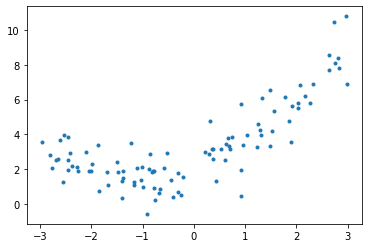

In [5]:
import matplotlib.pyplot as plt
plt.plot(x,y , '.')
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (seconddegree
polynomial) of each feature in the training set as a new feature

In [6]:
from sklearn.preprocessing import PolynomialFeatures 

In [7]:
polynomial_features = PolynomialFeatures(degree=2, include_bias= False)

In [8]:
x_ploy = polynomial_features.fit_transform(x)

In [9]:
x[0]

array([-2.1123239])

In [10]:
x_ploy[0]

array([-2.1123239 ,  4.46191224])

X_poly now contains the original feature of X plus the square of this feature. Now you
can fit a LinearRegression model to this extended training data

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_reg = LinearRegression()

In [13]:
lin_reg.fit(x_ploy,y)

LinearRegression()

In [14]:
lin_reg.intercept_ , lin_reg.coef_

(array([2.08256714]), array([[0.9857084 , 0.46841092]]))

In [15]:
x_new = np.array( [[1.72957919],[ 8.98376588],[ 0.98593133],[ 5.08141317]])

In [16]:
x_new_ploy = polynomial_features.fit_transform(x_new)

In [17]:
x_new_ploy[1]

array([ 8.98376588, 80.70804939])

In [18]:
y_predict = lin_reg.predict(x_new_ploy)

In [19]:
y_predict

array([[ 5.188653  ],
       [48.74247244],
       [ 3.50973173],
       [19.18608469]])

the model estimates y =5.0814*X^2 + 0.986*X +2.0774 when in fact the original

### Note

PolynomialFeatures(degree=d) transforms an array containing n
features into an array containing (n + d)! / d!n! features, where n! is
the factorial of n, equal to 1 × 2 × 3 × ⋯ × n. Beware of the combinatorial
explosion of the number of features!




This high-degree Polynomial Regression model is severely overfitting the training
data, while the linear model is underfitting it. The model that will generalize best in
this case is the quadratic model, which makes sense because the data was generated
using a quadratic model. But in general you won’t know what function generated the
data, so how can you decide how complex your model should be? How can you tell
that your model is overfitting or underfitting the data?

## Learning Curves

these are plots of the model’s performance
on the training set and the validation set as a function of the training set
size (or the training iteration). To generate the plots, train the model several times on
different sized subsets of the training set. The following code defines a function that,
given some training data, plots the learning curves of a model

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [21]:
def plot_learning_curves (model , x, y):
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
        plt.xlabel("Training set size")
        plt.ylabel("RMSE")

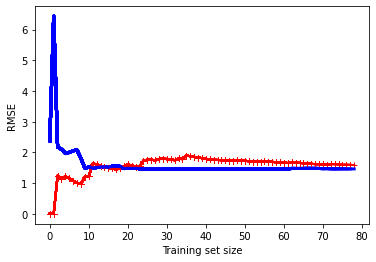

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

This model that’s underfitting

## Note 

If your model is underfitting the training data, adding more training
examples will not help. You need to use a more complex model
or come up with better features.

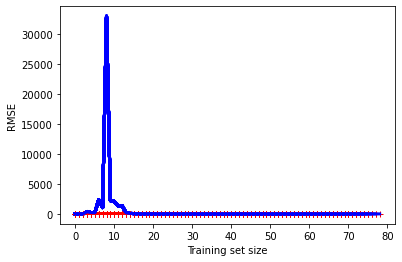

In [23]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, x, y)

• The error on the training data is much lower than with the Linear Regression
model.



### Note

One way to improve an overfitting model is to feed it more training
data until the validation error reaches the training error.

## Regularized Linear Models

a good way to reduce overfitting is to regularize the
model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. A simple way to regularize a polynomial model is to reduce
the number of polynomial degrees .

For a linear model, regularization is typically achieved by constraining the weights of
the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net,
which implement three different ways to constrain the weights.

## Ridge Regression
Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear
Regression: a regularization term equal to αΣi = 1^θ(i)^2 is added to the cost function.
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to use the
unregularized performance measure to evaluate the model’s performance.

### Note

It is quite common for the cost function used during training to be
different from the performance measure used for testing. Apart
from regularization, another reason they might be different is that a
good training cost function should have optimization-friendly
derivatives, while the performance measure used for testing should
be as close as possible to the final objective. For example, classifiers
are often trained using a cost function such as the log loss (discussed
in a moment) but evaluated using precision/recall

### Note


The hyperparameter α controls how much you want to regularize the model. If α = 0,
then Ridge Regression is just Linear Regression. If α is very large, then all weights end
up very close to zero and the result is a flat line going through the data’s mean.

## Ridge Regression cost function
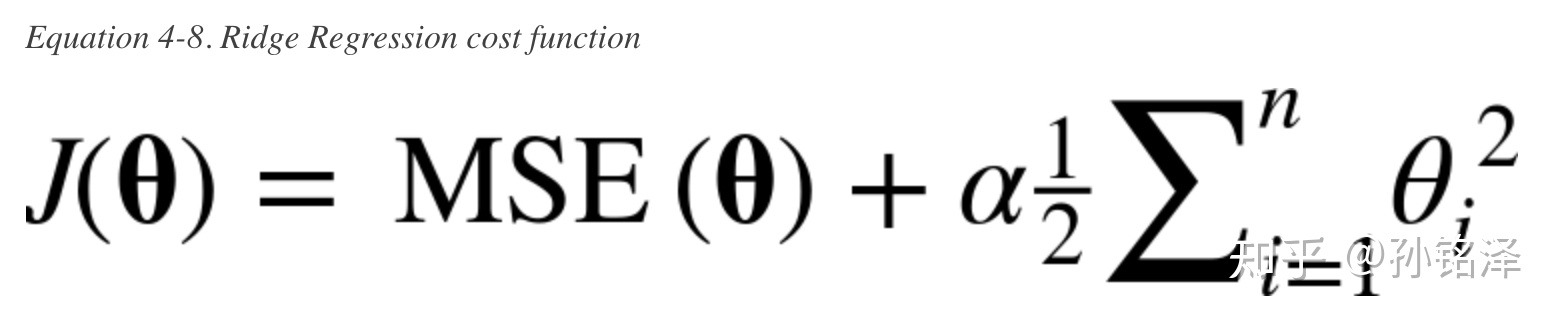

Note that the bias term θ0 is not regularized (the sum starts at i = 1, not 0). If we
define w as the vector of feature weights (θ1 to θn), then the regularization term is equal to ½(∥ w ∥)2,

where ∥ w ∥ represents the ℓ2 norm of the weight vector.10 For
Gradient Descent, just add αw to the MSE gradient vector

## Note

It is important to scale the data (e.g., using a StandardScaler)
before performing Ridge Regression, as it is sensitive to the scale of
the input features. This is true of most regularized models.

shows several Ridge models trained on some linear data using different α
values. On the left, plain Ridge models are used, leading to linear predictions. On the
right, the data is first expanded using PolynomialFeatures(degree=10), then it is
scaled using a StandardScaler, and finally the Ridge models are applied to the resulting
features: this is Polynomial Regression with Ridge regularization. Note how
increasing α leads to flatter (i.e., less extreme, more reasonable) predictions, thus
reducing the model’s variance but increasing its bias.

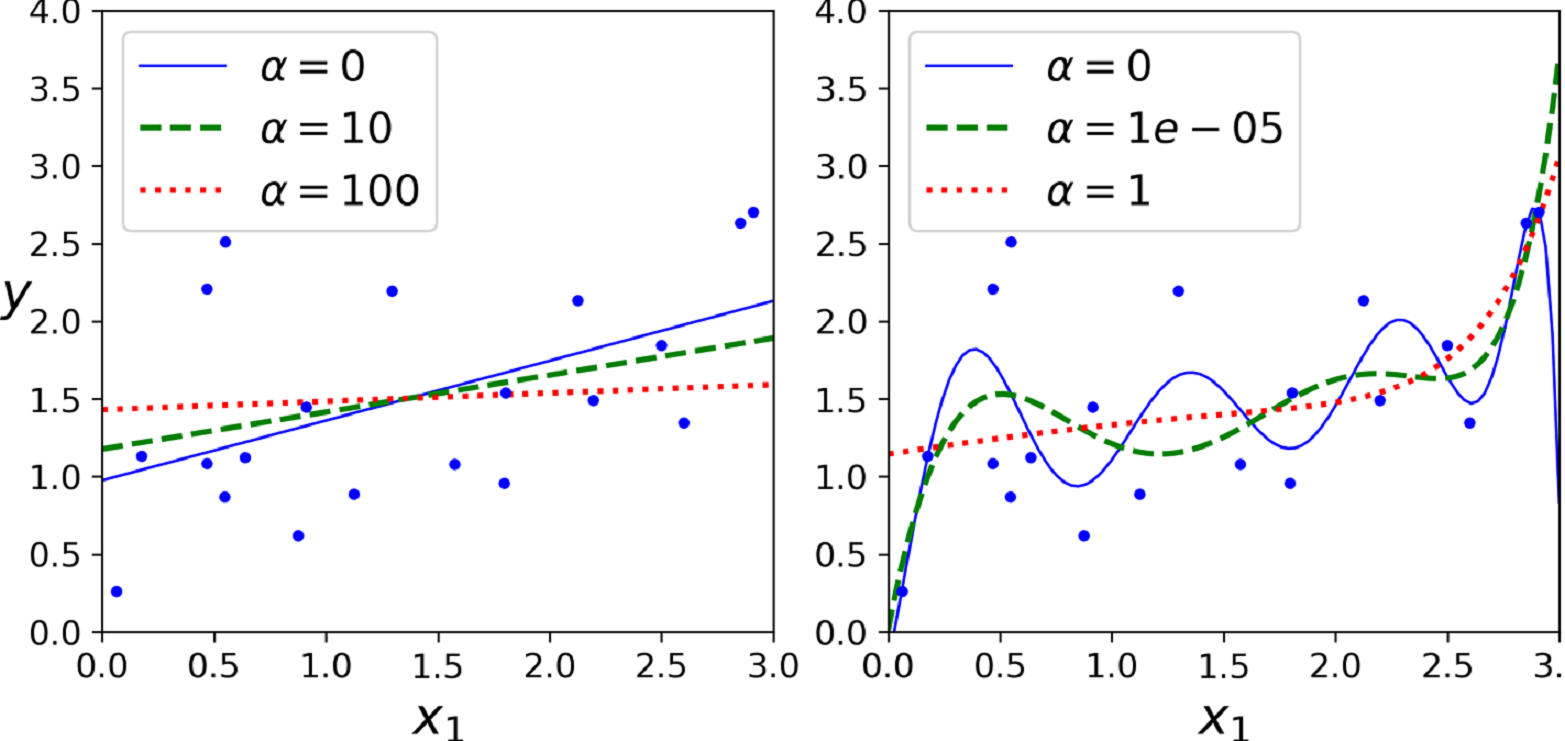

A linear model (left) and a polynomial model (right), both with various levels
of Ridge regularization


As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent. The pros and cons are the  closed-form equation or by performing Gradient Descent. The pros and cons are the same. Equation shows the closed-form solution, where A is the (n + 1) × (n + 1)
identity matrix,11 except with a 0 in the top-left cell, corresponding to the bias term. 

## Ridge Regression closed-form solution
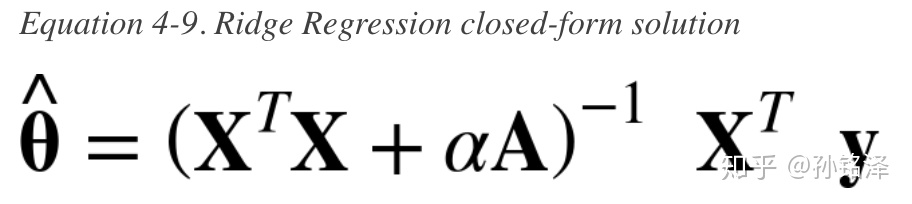

## Ridge Regression with Scikit-Learn

In [110]:
from sklearn.linear_model import Ridge

In [111]:
ridge_reg = Ridge(alpha = 0.1 , solver='cholesky')

In [112]:
ridge_reg.fit(x,y)

Ridge(alpha=0.1, solver='cholesky')

In [113]:
ridge_reg.predict([[1.5]])

array([[4.86821292]])

#### And using Stochastic Gradient Descent

In [106]:
from sklearn.linear_model import SGDRegressor

In [107]:
sgd_reg = SGDRegressor(penalty="l2") # l2 not 12

In [108]:
sgd_reg.fit(x,y.ravel())

SGDRegressor()

In [109]:
sgd_reg.predict([[1.5]])

array([4.85525455])

##### Note
The penalty hyperparameter sets the type of regularization term to use. Specifying
"l2" indicates that you want SGD to add a regularization term to the cost function
equal to half the square of the ℓ2 norm of the weight vector: this is simply Ridge
Regression.

## Lasso Regression

Lasso Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
of the weight vector instead of half the square of the ℓ2 norm

# Lasso Regression cost function
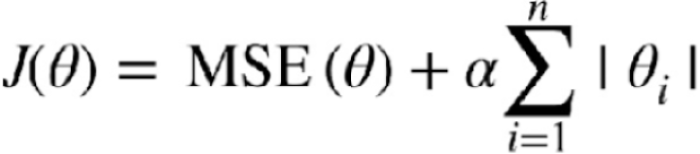

replaces Ridge models with
Lasso models and uses smaller α values.
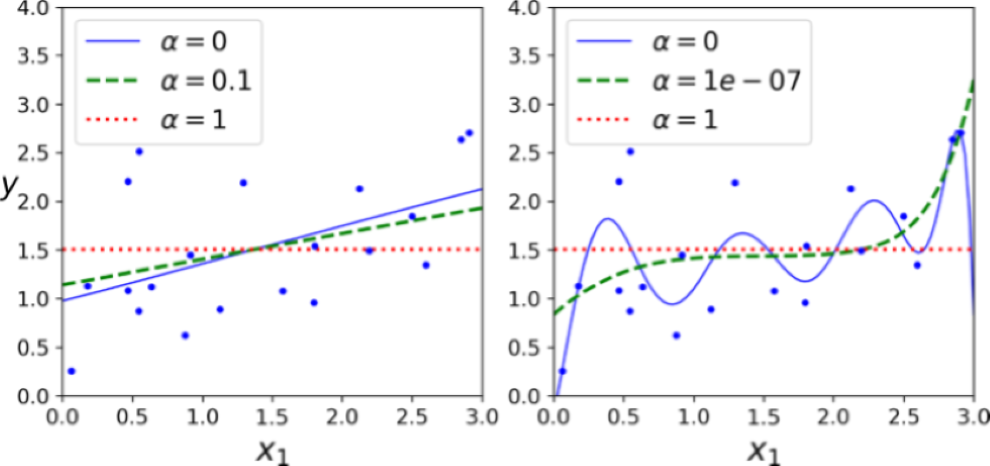

An important characteristic of Lasso Regression is that it tends to eliminate the
weights of the least important features (i.e., set them to zero). For example, the
dashed line in the righthand plot in Figure  (with α = 10-7) looks quadratic,
almost linear: all the weights for the high-degree polynomial features are equal to
zero. In other words, Lasso Regression automatically performs feature selection and
outputs a sparse model (i.e., with few nonzero feature weights)

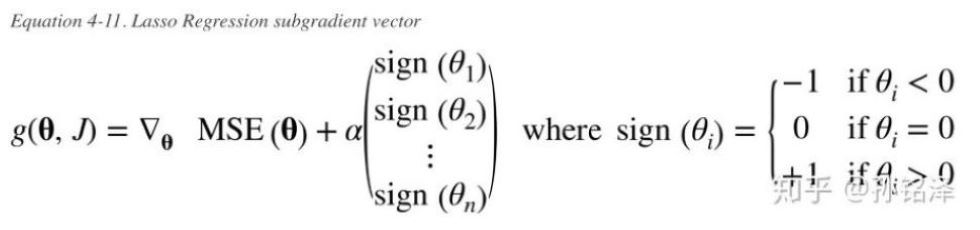

##  Scikit-Learn example using the Lasso class

In [87]:
from sklearn.linear_model import Lasso

In [88]:
laso_reg = Lasso(alpha=0.1)

In [89]:
laso_reg.fit(x,y)

Lasso(alpha=0.1)

In [90]:
laso_reg.predict([[1.5]])

array([4.81099256])

## Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression

## Elastic Net cost function
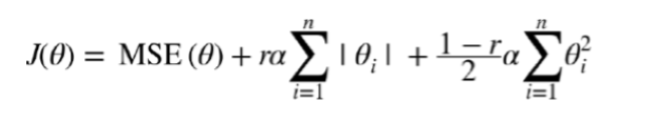

# Important Note
So when should you use plain Linear Regression (i.e., without any regularization),
Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of
regularization, so generally you should avoid plain Linear Regression. Ridge is a good
default, but if you suspect that only a few features are useful, you should prefer Lasso
or Elastic Net because they tend to reduce the useless features’ weights down to zero,
as we have discussed. In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly corr

### Here is a short example that uses Scikit-Learn’s ElasticNet (l1_ratio corresponds to the mix ratio r)

In [134]:
from sklearn.linear_model import ElasticNet

In [135]:
elastic_reg = ElasticNet(alpha = 0.1,l1_ratio= 0.5)

In [136]:
elastic_reg.fit(x,y)

ElasticNet(alpha=0.1)

In [137]:
elastic_reg.predict([[1.5]])

array([4.81295814])

## Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum. This is
called early stopping. Figure shows a complex model (in this case, a high-degree
Polynomial Regression model) being trained with Batch Gradient Descent. As the
epochs go by the algorithm learns, and its prediction error (RMSE) on the training
set goes down, along with its prediction error on the validation set. After a while
though, the validation error stops decreasing and starts to go back up. This indicates
that the model has started to overfit the training data. With early stopping you just
stop training as soon as the validation error reaches the minimum. It is such a simple
and efficient regularization technique that Geoffrey Hinton called it a “beautiful free
lunch.

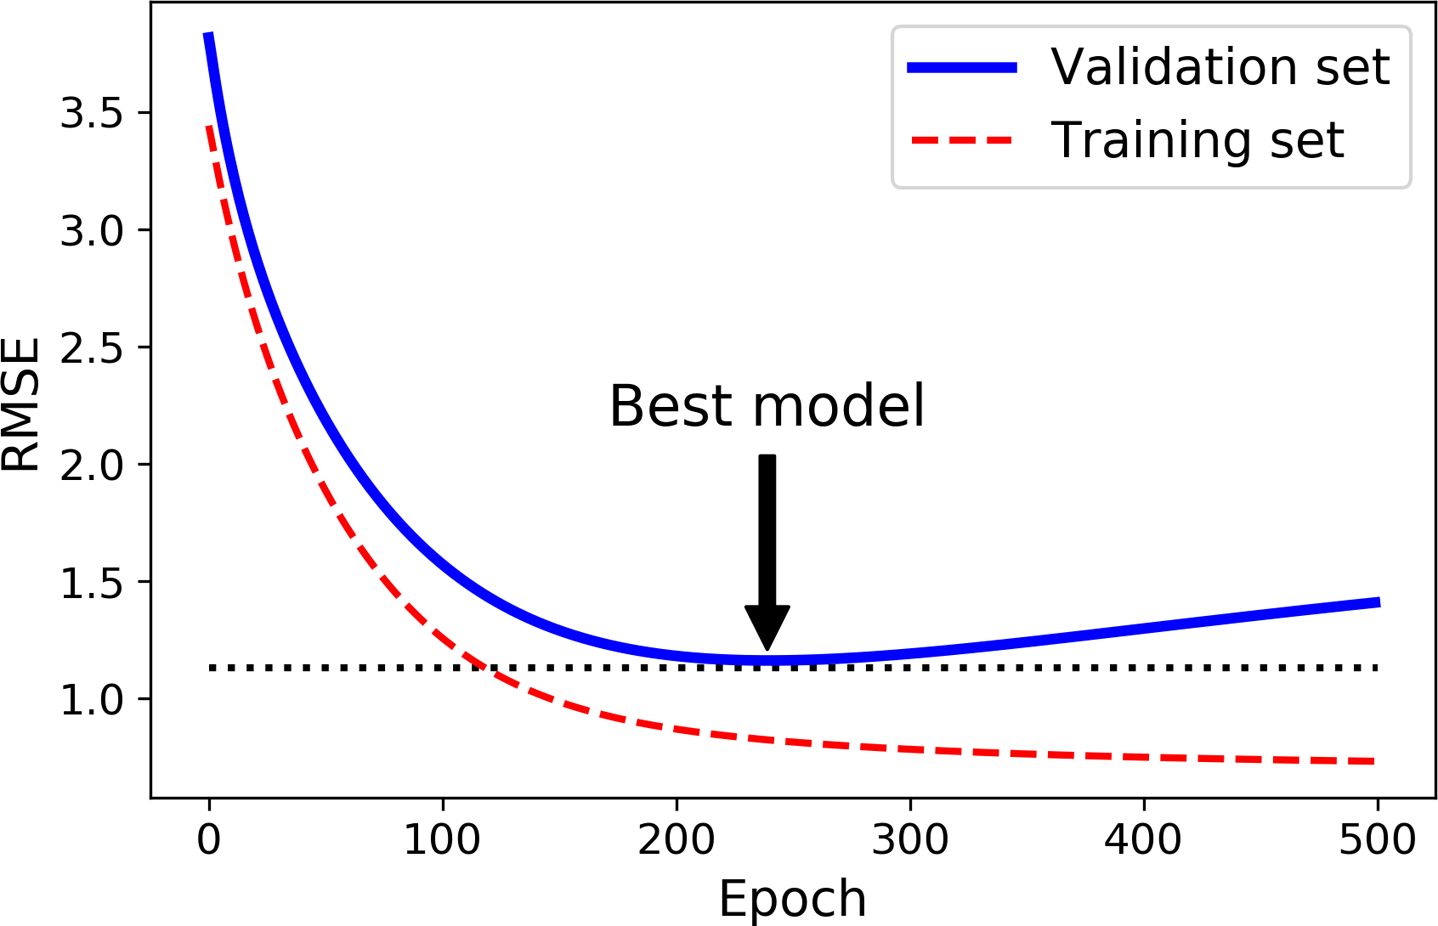

### Note

With Stochastic and Mini-batch Gradient Descent, the curves are
not so smooth, and it may be hard to know whether you have
reached the minimum or not. One solution is to stop only after the
validation error has been above the minimum for some time (when
you are confident that the model will not do any better), then roll
back the model parameters to the point where the validation error
was at a minimum.

### Basic implementation of early stopping

In [142]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [147]:
# prepare data
poly_scaler = Pipeline([('poly_feature',PolynomialFeatures(degree=90,include_bias= False))
,('std_scaler',StandardScaler())
])
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [176]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [177]:
sgd_reg = SGDRegressor(max_iter = 1 , tol = np.infty , warm_start = True
                      , penalty = None , learning_rate = 'constant',eta0=0.0005)

In [181]:
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

C:\Users\laptop\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve t

C:\Users\laptop\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve t

C:\Users\laptop\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve t

C:\Users\laptop\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o